# Sample Notebook

## Setup

### Imports
Put the import statements at the top so it is easy for your readers to know what they must install to use your notebook.

In [72]:
import pandas as pd
import plotnine as gg

In [73]:
from tqdm.notebook import tqdm

### Configurations

For instance, how to show cell output. 

In [74]:
# Example with default 'last'
sum(range(10)) #no

print(sum(range(10))) #yes

sum(range(100)) #yes

45

45


4950

In [75]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  

#Options: 'all', 'last', 'last_expr', 'none', 'last_expr_or_assign'

In [76]:
# Example v2 with 'all'
sum(range(10))        #yes
print(sum(range(10))) #yes
sum(range(100))       #yes

45

45


4950

## Working with data

### Loading Data

In [77]:
df = pd.read_csv("data/registration_times.csv")

In [78]:
df.head()
df.dtypes  #not the types we want!

,Registration Time,org
0,2022-10-19 13:43:15,cu
1,2022-10-19 18:53:05,cu
2,2022-10-27 09:56:39,cu
3,2022-10-25 13:45:37,cu
4,2022-10-20 09:37:27,cu


Registration Time    object
org                  object
dtype: object

### Aside: Editor Features

In [8]:
#demonstrate completion
pd.to_   #(tab)

AttributeError: module 'pandas' has no attribute 'to_'

In [9]:
#demonstate help
pd.to_datetime #(shift-tab)

<function pandas.core.tools.datetimes.to_datetime(arg: 'DatetimeScalarOrArrayConvertible | DictConvertible', errors: 'DateTimeErrorChoices' = 'raise', dayfirst: 'bool' = False, yearfirst: 'bool' = False, utc: 'bool' = False, format: 'str | None' = None, exact: 'bool | lib.NoDefault' = <no_default>, unit: 'str | None' = None, infer_datetime_format: 'lib.NoDefault | bool' = <no_default>, origin: 'str' = 'unix', cache: 'bool' = True) -> 'DatetimeIndex | Series | DatetimeScalar | NaTType | None'>

In [10]:
#contextual help in Help > Show Contextual Help

### Prep Data

In [79]:
df['Registration_Time'] = pd.to_datetime(df['Registration Time'], utc=False)
df['org'] = pd.Categorical(df.org, categories=['wcm', 'cu', 'other'])
df.dtypes

Registration Time            object
org                        category
Registration_Time    datetime64[ns]
dtype: object

In [14]:
df.describe(include='all')

,Registration Time,org,Registration_Time
count,266,266,266
unique,266,3,NaN
top,2022-10-19 13:43:15,wcm,NaN
freq,1,136,NaN
mean,NaN,NaN,2022-10-23 23:35:12.714285568
min,NaN,NaN,2022-10-18 13:04:49
25%,NaN,NaN,2022-10-19 13:28:39.750000128
50%,NaN,NaN,2022-10-20 11:08:16.500000
75%,NaN,NaN,2022-10-27 14:41:17.500000
max,NaN,NaN,2022-11-07 14:48:17


### Plot data

In [19]:
start_t =  pd.to_datetime('2022-10-18 13:00:00', utc=False)
stop_t = pd.to_datetime('2022-10-20 13:00:00', utc=False)

start_t =  pd.to_datetime('2022-10-19 1:00:00', utc=False)
stop_t = pd.to_datetime('2022-10-20 01:00:00', utc=False)

#pandas to manipulate data
plot_df = (
    df
    .sort_values("Registration_Time")
    .query("(Registration_Time >= @start_t) & (Registration_Time <= @stop_t)")
)

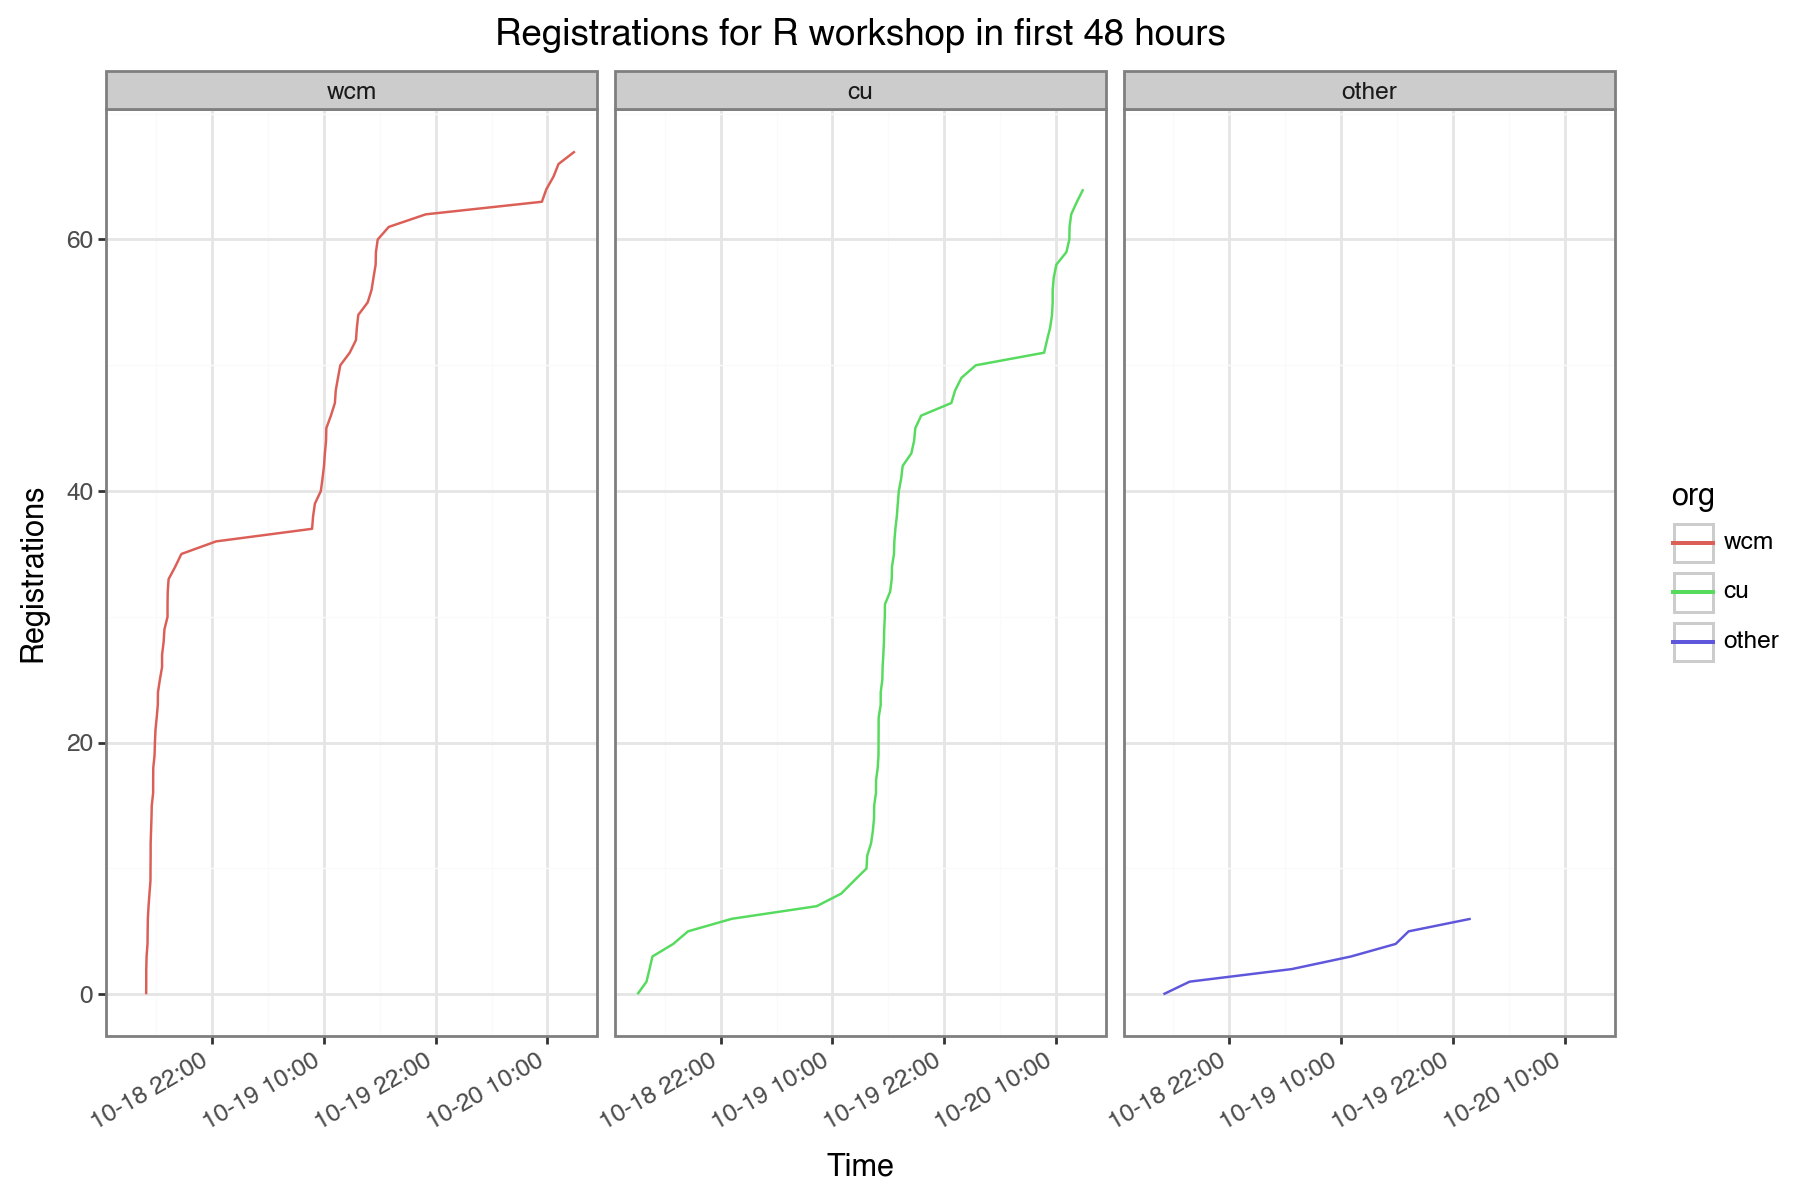

In [89]:
start_t =  pd.to_datetime('2022-10-18 13:00:00', utc=False)
stop_t = pd.to_datetime('2022-10-20 13:00:00', utc=False)

#pandas to manipulate data
plot_df = (
    df
    .sort_values("Registration_Time")
    .query("(Registration_Time >= @start_t) & (Registration_Time <= @stop_t)")
)
# Make a new variable with the cumulative count of registrations by group.
plot_df['count_group_reg'] = plot_df.groupby('org', observed=True).cumcount()

# plotnine to plot (using grammar of graphics like ggplot2)
plot = (
    gg.ggplot(plot_df, gg.aes(x='Registration_Time', y='count_group_reg', color='org'))
    + gg.geom_line()
    + gg.scale_x_datetime(
        breaks='12 hours', 
        date_labels='%m-%d %H:%M', 
    )
    + gg.facet_wrap('org')
    + gg.theme_bw()
    + gg.theme(figure_size=(9,6))
    + gg.theme(axis_text_x=gg.element_text(angle=30, hjust=1))
    + gg.xlab("Time")
    + gg.ylab("Registrations") 
    + gg.ggtitle("Registrations for R workshop in first 48 hours")
)
plot.show()

In [149]:
## Show save, download, export